# Student Performance: Analisi dei Pattern Sequenziali e Apprendimento Supervisionato

## Descrizione del Notebook

L’analisi della Student Performance rappresenta un campo cruciale per comprendere i fattori che influenzano il rendimento accademico e sviluppare strategie mirate per ottimizzare l’apprendimento. Questo lavoro combina tecniche di Supervised Learning e Sequential Pattern Mining per estrarre insight significativi dai dati degli studenti, migliorando la capacità di predizione e interpretazione.

In particolare, il modello integra **OLS**, **Decision Trees**, **k-NN** e **ANN** per la classificazione del rendimento accademico, ottimizzato tramite tecniche di pruning per ridurre l’overfitting e migliorare la generalizzazione. Parallelamente, l’algoritmo **Apriori** viene impiegato per identificare pattern sequenziali nascosti nelle abitudini di studio e nei comportamenti degli studenti, fornendo una visione più dettagliata delle associazioni tra variabili educative.

Grazie a questa combinazione di metodologie, il progetto non solo permette di prevedere la performance degli studenti, ma offre anche strumenti analitici per identificare le strategie di apprendimento più efficaci, contribuendo a decisioni informate nel contesto educativo.

## Indice

- [Descrizione Dataset](#descrizione-del-dataset)
- [Caricamento e Preprocessing dei Dati](#caricamento-e-preprocessing-dei-dati)
- [Rimozione delle Variabili Non Necessarie](#rimozione-delle-variabili-non-necessarie)
- [Sequential Pattern Analysis](#sequential-pattern-analysis)
    - [Metriche di Valutazione](#metriche-di-valutazione)
    - [Algoritmo Apriori](#apriori-algorithm)
    - [Risultati dell'Analisi Sequenziale](#risultati-dellanalisi-sequenziale)
- [Supervised Learning: Modelli Predittivi](#supervised-learning-modelli-predittivi)
    - [OLS (Ordinary Least Squares)](#ordinary-least-squares-ols)
    - [Decision Tree](#decision-tree)
    - [K-Nearest Neighbors (k-NN)](#k-nearest-neighbors-knn)
    - [Artificial Neural Network (ANN)](#artificial-neural-network-ann)
    - [Risultati e Confronto Modelli](#risultati-e-confronto-modelli)
- [Conclusioni](#conclusioni)

## Descrizione Dataset

**Student Information**
- **StudentID**: A unique identifier assigned to each student (1001 to 3392).
- **Age**: The age of the students (15 to 18 years).
- **Gender**: Gender of the students  
    - 0: Male  
    - 1: Female
- **Ethnicity**:  
    - 0: Caucasian  
    - 1: African American  
    - 2: Asian  
    - 3: Other
- **ParentalEducation**: Education level of the parents  
    - 0: None  
    - 1: High School  
    - 2: Some College  
    - 3: Bachelor's  
    - 4: Higher
**Study Habits**
- **StudyTimeWeekly**: Weekly study time in hours (0 to 20).
- **Absences**: Number of absences during the school year (0 to 30).
- **Tutoring**: Tutoring status  
    - 0: No  
    - 1: Yes

**Parental Involvement**
- **ParentalSupport**: Level of parental support  
    - 0: None  
    - 1: Low  
    - 2: Moderate  
    - 3: High  
    - 4: Very High

**Extracurricular Activities**
- **Extracurricular**: Participation in extracurricular activities (0: No, 1: Yes)
- **Sports**: Participation in sports (0: No, 1: Yes)
- **Music**: Participation in music (0: No, 1: Yes)
- **Volunteering**: Participation in volunteering (0: No, 1: Yes)

**Academic Performance**
- **GPA**: Grade Point Average on a scale from 0 to 4.0
- **GradeClass**: Class grade  
    - 0: 'A' (GPA >= 3.5)
    - 1: 'B' (3.0 <= GPA < 3.5)
    - 2: 'C' (2.5 <= GPA < 3.0)
    - 3: 'D' (2.0 <= GPA < 2.5)
    - 4: 'F' (GPA < 2.0)

---

In [21]:
import pandas as pd

student_data = pd.read_csv('Student_performance_data.csv')
student_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Non sono presenti valori NA nel dataset, quindi non è necessario rimuovere alcun record, né di apportare modifiche al dataset in tal senso.

## Rimozione delle variabili non necessarie

In [22]:
student_data = student_data.drop(columns=['StudentID'])
student_data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Sequential Pattern Analysis

L'analisi dei pattern sequenziali è una tecnica di data mining che permette di identificare combinazioni ricorrenti di eventi o azioni in un dataset. Solitamente applicata su dati temporali, può essere estesa anche a contesti non sequenziali, dove l'obiettivo è individuare configurazioni di caratteristiche che si verificano insieme con una certa regolarità.

In questo progetto, l'analisi sequenziale viene utilizzata per esplorare relazioni tra fattori educativi, identificando pattern significativi che possono influenzare la student performance. Sebbene i dati non siano direttamente temporali, possono comunque essere trattati come sequenze logiche di eventi, per esempio:

- Quali combinazioni di abitudini di studio, supporto familiare e attività extracurriculari si verificano più frequentemente tra studenti con buon rendimento?

- Quali configurazioni di assenze, livello di studio e coinvolgimento in tutoraggio sono più comuni nei gruppi con performance più basse?

### Metriche di valutazione

- **Support**: la frequenza con cui una sequenza appare nel dataset:
    $$\text{support} (A\rightarrow C) = \frac{\text{support(\{A,C\})}}{|T|} $$
- **Confidence**: la probabilità che, dato un certo pattern, ne segua un altro:
    $$\text{confidence} (A\rightarrow C) = \frac{\text{support}(A\rightarrow C)}{\text{support}(A)} \quad \text{range}[0, 1]$$
- **Lift**: misura la forza della regola rispetto all’indipendenza statistica:
    $$\text{lift} (A\rightarrow C) = \frac{\text{confidence}(A\rightarrow C)}{\text{support}(C)} \quad \text{range}[0, +\infty]$$

### Algoritmo Apriori 
L'algoritmo Apriori è un metodo classico per l'estrazione di pattern frequenti in dataset di grandi dimensioni. Si basa sull'idea che se un insieme di elementi è frequente, allora tutti i suoi sottoinsiemi devono essere frequenti. Questo permette di ridurre significativamente lo spazio di ricerca, evitando combinazioni non promettenti. Infatti, se un sottoinsieme non è frequente, non lo sarà nemmeno il suo superset, ovvero un insieme che contiene quel sottoinsieme.
L'algoritmo procede in due fasi principali:
1. **Generazione di Candidati**: A partire da un insieme di elementi frequenti, vengono generati nuovi candidati combinando gli elementi esistenti. 
2. **Pruning**: I candidati vengono filtrati per rimuovere quelli che non soddisfano il supporto minimo richiesto.
3. **Calcolo del Supporto**: Si calcola il supporto per i candidati rimanenti, mantenendo solo quelli che superano la soglia minima.    
4. **Iterazione**: Il processo viene ripetuto fino a quando non si trovano più candidati frequenti.

In questo progetto, l'algoritmo Apriori viene utilizzato per identificare le combinazioni di variabili che si verificano frequentemente tra gli studenti, fornendo insight utili per capire quali fattori influenzano maggiormente la performance accademica. In particolare, viene posto il support minimo a 0.1, il che significa che solo le combinazioni che appaiono in almeno il 10% dei record saranno considerate significative, e la confidence minima a 0.7, per garantire che le associazioni siano abbastanza forti da essere rilevanti.

In [23]:
import pandas as pd


#Trasformo le variabili continue in variabili binarie scegliendo i range di valori
# Trasformazione di StudyTimeWeekly, Absences, Age e GradeClass in variabili binarie
student_data['StudyTimeWeekly_s'] = student_data['StudyTimeWeekly'].between(0, 5)
student_data['StudyTimeWeekly_m'] = student_data['StudyTimeWeekly'].between(6, 10)
student_data['StudyTimeWeekly_l'] = student_data['StudyTimeWeekly'].between(11, 20)

student_data['Absences_s'] = student_data['Absences'].between(0, 10)
student_data['Absences_m'] = student_data['Absences'].between(11, 15)
student_data['Absences_l'] = student_data['Absences'].between(16, 20)
student_data['Absences_xl'] = student_data['Absences'] > 20

student_data['Age_15_16'] = student_data['Age'].between(15, 16)
student_data['Age_17_18'] = student_data['Age'].between(17, 18)

student_data['GradeClass_Good'] = student_data['GradeClass'].isin([0, 2])
student_data['GradeClass_Bad'] = student_data['GradeClass'].isin([3, 4])

# Trasformazione delle variabili categoriche in variabili binarie (one-hot encoding) dove necessario
categorical_vars = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
                    'Extracurricular', 'Sports', 'Music', 'Volunteering']

for col in categorical_vars:
    if student_data[col].nunique() > 2:
        dummies = pd.get_dummies(student_data[col], prefix=col)
        student_data = pd.concat([student_data, dummies], axis=1)
        student_data.drop(columns=[col], inplace=True)
    else:
        # Ensure binary columns are 0/1
        student_data[col] = student_data[col].astype(int)
student_data = student_data.drop(columns=['StudyTimeWeekly','Age','Absences','GPA','GradeClass'])  
student_data.head()



,Gender,Tutoring,Extracurricular,Sports,Music,Volunteering,StudyTimeWeekly_s,StudyTimeWeekly_m,StudyTimeWeekly_l,Absences_s,...,ParentalEducation_0,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,ParentalSupport_0,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4
0,1,1,0,0,1,0,False,False,True,True,...,False,False,True,False,False,False,False,True,False,False
1,0,0,0,0,0,0,False,False,True,True,...,False,True,False,False,False,False,True,False,False,False
2,0,0,0,0,0,0,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,1,0,1,0,0,0,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,1,1,0,0,0,0,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [26]:
from mlxtend.frequent_patterns import apriori, association_rules
# Trova gli itemset frequenti
student_data_bool = student_data.astype(bool)  # Converte tutte le colonne in bool
frequent_itemsets = apriori(student_data_bool, min_support=0.1, use_colnames=True)
# Genera le regole di associazione
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Visualizza le regole
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                           antecedents       consequents   support  \
0                  (StudyTimeWeekly_s)  (GradeClass_Bad)  0.185619   
1                  (StudyTimeWeekly_m)  (GradeClass_Bad)  0.151756   
2                    (GradeClass_Good)      (Absences_s)  0.170151   
3                         (Absences_m)  (GradeClass_Bad)  0.149666   
4                         (Absences_l)  (GradeClass_Bad)  0.163462   
5                        (Absences_xl)  (GradeClass_Bad)  0.281355   
6                (ParentalEducation_3)  (GradeClass_Bad)  0.107860   
7                  (ParentalSupport_1)  (GradeClass_Bad)  0.150084   
8                (Absences_xl, Gender)  (GradeClass_Bad)  0.147157   
9                  (Age_15_16, Gender)  (GradeClass_Bad)  0.177676   
10      (Absences_xl, Extracurricular)  (GradeClass_Bad)  0.110368   
11    (Absences_xl, StudyTimeWeekly_l)  (GradeClass_Bad)  0.125418   
12            (Absences_xl, Age_15_16)  (GradeClass_Bad)  0.146321   
13            (Absen

### Risultati dell'Analisi Sequenziale

Di seguito sono riportati tutti i pattern sequenziali estratti tramite l’algoritmo Apriori, con i relativi valori di **supporto** e **lift**. Ogni regola mostra la relazione tra variabili binarie/categorical del dataset e la probabilità che si verifichino insieme in modo statisticamente significativo.

\[
\begin{array}{|c|l|c|c|}
\hline
\# & \text{Pattern (Antecedente} \Rightarrow \text{Consequente)} & \text{Supporto} & \text{Lift} \\
\hline
1 & (\text{StudyTimeWeekly\_s}) \Rightarrow (\text{GradeClass\_Bad}) & 0.186 & 1.10 \\
2 & (\text{StudyTimeWeekly\_m}) \Rightarrow (\text{GradeClass\_Bad}) & 0.152 & 1.04 \\
3 & (\text{GradeClass\_Good}) \Rightarrow (\text{Absences\_s}) & 0.170 & 2.31 \\
4 & (\text{Absences\_m}) \Rightarrow (\text{GradeClass\_Bad}) & 0.150 & 1.23 \\
5 & (\text{Absences\_l}) \Rightarrow (\text{GradeClass\_Bad}) & 0.163 & 1.37 \\
6 & (\text{Absences\_xl}) \Rightarrow (\text{GradeClass\_Bad}) & 0.281 & 1.41 \\
7 & (\text{ParentalEducation\_3}) \Rightarrow (\text{GradeClass\_Bad}) & 0.108 & 1.03 \\
8 & (\text{ParentalSupport\_1}) \Rightarrow (\text{GradeClass\_Bad}) & 0.150 & 1.08 \\
9 & (\text{Absences\_xl}, \text{Gender}) \Rightarrow (\text{GradeClass\_Bad}) & 0.147 & 1.43 \\
10 & (\text{Age\_15\_16}, \text{Gender}) \Rightarrow (\text{GradeClass\_Bad}) & 0.178 & 1.04 \\
11 & (\text{Absences\_xl}, \text{Extracurricular}) \Rightarrow (\text{GradeClass\_Bad}) & 0.110 & 1.42 \\
12 & (\text{Absences\_xl}, \text{StudyTimeWeekly\_l}) \Rightarrow (\text{GradeClass\_Bad}) & 0.125 & 1.41 \\
13 & (\text{Absences\_xl}, \text{Age\_15\_16}) \Rightarrow (\text{GradeClass\_Bad}) & 0.146 & 1.43 \\
14 & (\text{Absences\_xl}, \text{Age\_17\_18}) \Rightarrow (\text{GradeClass\_Bad}) & 0.135 & 1.39 \\
15 & (\text{Ethnicity\_0}, \text{Absences\_xl}) \Rightarrow (\text{GradeClass\_Bad}) & 0.148 & 1.41 \\
16 & (\text{Absences\_xl}, \text{ParentalEducation\_2}) \Rightarrow (\text{GradeClass\_Bad}) & 0.111 & 1.42 \\
17 & (\text{ParentalSupport\_2}, \text{Age\_15\_16}) \Rightarrow (\text{GradeClass\_Bad}) & 0.119 & 1.03 \\
\hline
\end{array}
\]

L’analisi dei pattern sequenziali tramite l’algoritmo Apriori ha permesso di identificare associazioni significative tra le variabili socio-demografiche, le abitudini di studio e la performance accademica degli studenti. In particolare, sono emersi pattern ricorrenti che collegano bassi livelli di studio settimanale e un alto numero di assenze a un rendimento scolastico insoddisfacente (GPA basso). Alcuni pattern, come l’associazione tra molte assenze (`Absences_xl`) e la classe di rendimento negativo (`GradeClass_Bad`), presentano un lift elevato (>1.4), indicando una forte dipendenza tra questi fattori. Inoltre, il supporto di tali regole è consistente, suggerendo che questi comportamenti sono diffusi nel campione analizzato. Questi risultati confermano l’importanza delle variabili comportamentali nella determinazione della performance scolastica.


## Supervised Learning: Modelli Predittivi

I modelli predittivi sono strumenti di machine learning utilizzati per stimare o prevedere il valore di una variabile target (ad esempio il GPA) sulla base di un insieme di variabili esplicative (feature). Il loro scopo principale è identificare pattern e relazioni nei dati che permettano di effettuare previsioni su nuovi casi non ancora osservati.

Il funzionamento di un modello predittivo si basa su una fase di addestramento, in cui il modello apprende dai dati storici, e una fase di test, in cui viene valutata la sua capacità di generalizzare su dati nuovi.

In questa seconda parte del notebook sono stati utilizzati diversi modelli predittivi supervisionati per stimare il rendimento accademico degli studenti:
- **Regressione Lineare (OLS)**: Modello lineare che stima la relazione tra le feature e il GPA.
- **Decision Tree**: Modello ad albero che suddivide i dati in base a regole decisionali per prevedere il GPA.
- **k-Nearest Neighbors (k-NN)**: Modello che prevede il GPA di uno studente sulla base dei valori osservati nei "k" studenti più simili.
- **Artificial Neural Network (ANN)**: Modello ispirato alle reti neurali biologiche, in grado di apprendere relazioni complesse e non lineari tra le variabili.

Questi modelli sono stati confrontati in termini di accuratezza e capacità di generalizzazione, al fine di individuare l’approccio più efficace per la previsione del rendimento scolastico e verificare se le associazioni identificate nell'analisi sequenziale si riflettono anche nelle performance predittive.
Inziamo suddividendo il dataset in training e test set, utilizzando il 80% dei dati per il training e il 20% per il test. Utilizzeremo la variabile GPA come target, mentre le altre variabili saranno utilizzate come features.

In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd

student_data = pd.read_csv('Student_performance_data.csv')
student_data = student_data.drop(columns=['StudentID','GradeClass'])  
student_data.head()
X = student_data.drop(columns=['GPA'])
y = student_data['GPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### OLS (Ordinary Least Squares)

In [8]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions_train = lr.predict(X_train)
predictions_test = lr.predict(X_test)

print("Linear Regression Coefficients:")
coef_table = list(zip(lr.feature_names_in_, lr.coef_))
coef_df = pd.DataFrame(coef_table, columns=["Feature", "Coefficient"])
print(coef_df)

print("Training Set MSE: ", mse(y_train, predictions_train))
print("Test Set MSE: ", mse(y_test, predictions_test))


Linear Regression Coefficients:
              Feature  Coefficient
0                 Age    -0.005734
1              Gender     0.010516
2           Ethnicity     0.004744
3   ParentalEducation     0.000125
4     StudyTimeWeekly     0.029039
5            Absences    -0.099517
6            Tutoring     0.258262
7     ParentalSupport     0.147838
8     Extracurricular     0.189546
9              Sports     0.184991
10              Music     0.152484
11       Volunteering    -0.005282
Training Set MSE:  0.038497064610156735
Test Set MSE:  0.038661441494542544


Dai risultati ottenuti dalla regressione lineare, possiamo osservare che l'MSE sia di training che di test sono relativamente bassi, indicando che il modello si adatta bene ai dati e la sua capacità di generalizzazione è soddisfacente in quanto i due valori sono molto simili. Dal valore del coefficiente di regressione relativo alla variabile `Absences`, possiamo notare che un aumento delle ore di assenza è associato a un decremento del GPA. Questa relazione è coerente con ciò che aveva mostrato l'analisi sequenziale, dove molte assenze erano correlate a un rendimento accademico peggiore, in particolare nella regola 6, dove le assenze elevate erano associate a un GPA basso con un supporto del 28.1% e un lift di 1.41.

### Decision Tree

Train Score: 0.83
Test Score: 0.81
Miglior set di parametri: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_split': 10}
Train Score dopo GridSearch: 0.97
Test Score dopo GridSearch: 0.88
Decision Tree Train MSE: 0.0291
Decision Tree Test MSE: 0.0962
Confusion Matrix:
 [[ 22 208]
 [228  21]]
Accuracy: 0.090
Error Rate: 0.910


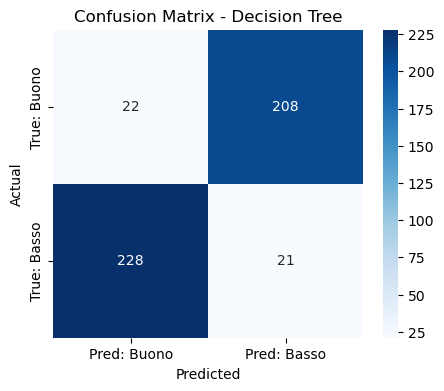

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Creazione del Decision Tree con pruning
dt3 = DecisionTreeRegressor(max_depth=3, random_state=42, ccp_alpha=0.01)  # Pruning con valore iniziale
dt3.fit(X_train, y_train)

print(f"Train Score: {dt3.score(X_train, y_train):.2f}")
print(f"Test Score: {dt3.score(X_test, y_test):.2f}")

# **Ottimizzazione dei parametri con GridSearchCV (incluso pruning)**
dt = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'ccp_alpha': [0.0, 0.005, 0.01, 0.02, 0.05]  # Range di pruning da testare
}

grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Migliori parametri trovati
print(f"Miglior set di parametri: {grid_search.best_params_}")

# Creazione del miglior modello con pruning ottimizzato
dt_best = DecisionTreeRegressor(**grid_search.best_params_)
dt_best.fit(X_train, y_train)
# Valutazione finale con il miglior modello trovato
print(f"Train Score dopo GridSearch: {dt_best.score(X_train, y_train):.2f}")
print(f"Test Score dopo GridSearch: {dt_best.score(X_test, y_test):.2f}")

# Calcolo dell'MSE per il miglior modello Decision Tree
dt_train_mse = mean_squared_error(y_train, dt_best.predict(X_train))
dt_test_mse = mean_squared_error(y_test, dt_best.predict(X_test))
print(f"Decision Tree Train MSE: {dt_train_mse:.4f}")
print(f"Decision Tree Test MSE: {dt_test_mse:.4f}")

# Per Decision Tree Regressor, convert predictions to discrete classes for confusion matrix
# Supponiamo che GPA < 2 sia "buono" (1), altrimenti "basso" (0)

threshold = 2.0
y_test_class = (y_test < threshold).astype(int)
y_test_pred_class = (dt_best.predict(X_test) > threshold).astype(int)

cm = confusion_matrix(y_test_class, y_test_pred_class)
acc = accuracy_score(y_test_class, y_test_pred_class)
err = 1 - acc

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.3f}")
print(f"Error Rate: {err:.3f}")
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: Buono', 'Pred: Basso'], yticklabels=['True: Buono', 'True: Basso'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

I risultati del Decision Tree mostrano un MSE sia di training che di test più alto rispetto a OLS, con un forte sbilanciamento tra i due, questo suggerisce un possibile overfitting del modello sui dati di training. Inoltre, l'accuracy è del 9%, decisamente molto bassa, indicando che il modello non riesce a generalizzare bene sui dati di test.

### k-Nearest Neighbors (k-NN)

Il k-Nearest Neighbors (k-NN) è un algoritmo di apprendimento supervisionato utilizzato sia per problemi di classificazione che di regressione.

#### Come funziona il k-NN

Nel notebook, il k-NN viene applicato per la regressione, variando il valore di *k* (numero di vicini) e utilizzando la distanza euclidea (p=2) come metrica di distanza. Le feature vengono standardizzate prima dell’addestramento. Per ogni valore di *k*, il modello viene addestrato sul training set e valutato tramite l’errore quadratico medio (MSE) sia sul training che sul test set, al fine di individuare il valore ottimale di *k* che meglio bilancia bias e varianza.

#### Vantaggi

- **Semplicità**: Non richiede una fase di training vera e propria, ma solo la memorizzazione dei dati.
- **Flessibilità**: Può modellare relazioni non lineari tra le variabili.
- **Intuitivo**: La logica del "vicino" è facilmente interpretabile.

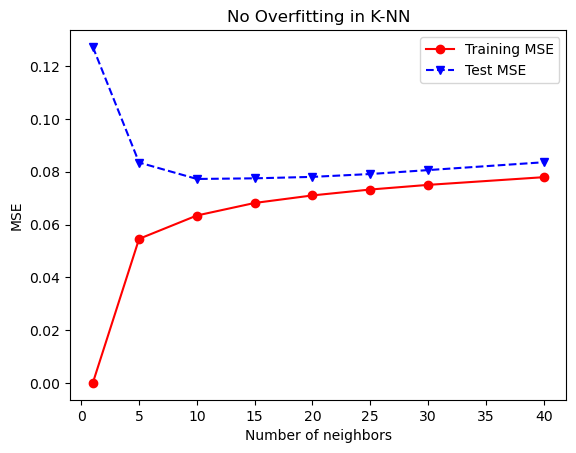

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 40]
trainAcc = []
testAcc = []

for k in numNeighbors:
    knn = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    trainAcc.append(train_mse)
    testAcc.append(test_mse)

plt.plot(numNeighbors, trainAcc, 'ro-', label='Training MSE')
plt.plot(numNeighbors, testAcc, 'bv--', label='Test MSE')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')
plt.title('No Overfitting in K-NN')
plt.show()

In [20]:
knn = KNeighborsRegressor(n_neighbors=25, metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)
knn_train_mse = mean_squared_error(y_train, y_train_pred_knn)
knn_test_mse = mean_squared_error(y_test, y_test_pred_knn)
print("KNN (k=25) Train MSE:", knn_train_mse)
print("KNN (k=25) Test MSE:", knn_test_mse)

KNN (k=25) Train MSE: 0.0732625329134305
KNN (k=25) Test MSE: 0.07913599288529535


### Artificial Neural Network (ANN)

## Artificial Neural Network (ANN) e il metodo Perceptron

Le Artificial Neural Network (ANN) sono modelli ispirati al funzionamento del cervello umano, composte da nodi (neuroni artificiali) organizzati in strati (layer). Ogni neurone riceve input, li elabora tramite una funzione di attivazione e trasmette il risultato agli strati successivi. Le ANN sono particolarmente efficaci per modellare relazioni non lineari e complesse tra le variabili.

### Il Perceptron

Il Perceptron è il modello base di un neurone artificiale. Funziona come segue:
- Riceve in input un vettore di caratteristiche $\mathbf{x} = [x_1, x_2, ..., x_n]$.
- Ogni input è moltiplicato per un peso $w_i$ e sommato a un bias $b$.
- La somma pesata viene passata a una funzione di attivazione (tipicamente una funzione soglia o una funzione non lineare come ReLU o sigmoid).

La formula matematica del Perceptron è:
$$
y = f\left(\sum_{i=1}^n w_i x_i + b\right)
$$
dove $f$ è la funzione di attivazione.

### ANN Multistrato (MLP)

Un'ANN multistrato (Multi-Layer Perceptron, MLP) combina più Perceptron organizzati in strati:
- **Strato di input**: riceve i dati grezzi.
- **Strati nascosti**: ciascun neurone riceve input dagli strati precedenti e applica una funzione di attivazione non lineare.
- **Strato di output**: produce la previsione finale.

Durante l’addestramento, la rete aggiorna i pesi tramite l’algoritmo di backpropagation, minimizzando una funzione di costo (ad esempio, l’MSE per la regressione).

### Applicazione nel notebook

Nel notebook, l’ANN è stata implementata con `MLPRegressor` di scikit-learn, che rappresenta un MLP con un singolo hidden layer da 100 neuroni e funzione di attivazione ReLU. Questo modello è in grado di apprendere pattern complessi tra le variabili socio-demografiche e il GPA degli studenti, superando i limiti dei modelli lineari semplici.

**Vantaggi dell’ANN:**
- Capacità di modellare relazioni non lineari.
- Flessibilità nell’architettura (numero di layer e neuroni).
- Buona generalizzazione se opportunamente regolarizzata.

**Limiti:**
- Richiede più dati e potenza computazionale rispetto a modelli semplici.
- Può soffrire di overfitting se non regolarizzata o se la rete è troppo complessa rispetto ai dati disponibili.

In sintesi, il Perceptron è il mattone fondamentale delle ANN, e la loro combinazione in strutture multistrato consente di affrontare problemi predittivi complessi come la stima del rendimento accademico.

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
ann = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
ann.fit(X_train_scaled, y_train)

# Training and test predictions
y_train_pred_ann = ann.predict(X_train_scaled)
y_test_pred_ann = ann.predict(X_test_scaled)

# Calculate MSE
ann_train_mse = mean_squared_error(y_train, y_train_pred_ann)
ann_test_mse = mean_squared_error(y_test, y_test_pred_ann)

print("ANN Train MSE:", ann_train_mse)
print("ANN Test MSE:", ann_test_mse)

ANN Train MSE: 0.03334441752337715
ANN Test MSE: 0.049187481028983106


## Risultati e Confronto Modelli

In [17]:
results = [  
    {
        "Model": "Linear Regression",
        "Hyperparameters": "default",
        "Training MSE": mse(y_train, predictions_train),
        "Test MSE": mse(y_test, predictions_test)
    },
    {
        "Model": "Decision Tree (best)",
        "Hyperparameters": f"max_depth={dt_best.max_depth}, min_samples_split={dt_best.min_samples_split}, ccp_alpha={dt_best.ccp_alpha}",
        "Training MSE": mean_squared_error(y_train, dt_best.predict(X_train)),
        "Test MSE": mean_squared_error(y_test, dt_best.predict(X_test))
    },
    {
        "Model": "KNN (n_neighbors=25)",
        "Hyperparameters": f"n_neighbors={knn.n_neighbors}",
        "Training MSE": knn_train_mse,
        "Test MSE": knn_test_mse
    },
    {
        "Model": "ANN",
        "Hyperparameters": "hidden_layer_sizes=(100,), activation=relu, solver=adam",
        "Training MSE": ann_train_mse,
        "Test MSE": ann_test_mse
    }
]

results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)
display(results_df)



,Hyperparameters,Training MSE,Test MSE
Model,,,
Linear Regression,default,0.038497,0.038661
Decision Tree (best),"max_depth=10, min_samples_split=10, ccp_alpha=0.0",0.029051,0.096192
KNN (n_neighbors=25),n_neighbors=25,0.073263,0.079136
ANN,"hidden_layer_sizes=(100,), activation=relu, so...",0.033344,0.049187


La parte di supervised learning ha confrontato diversi modelli predittivi (OLS, Decision Tree, k-NN, ANN) per stimare il GPA degli studenti. Dai risultati sintetizzati nella tabella finale, emerge che:

- **Linear Regression (OLS)** mostra buone prestazioni, con MSE di training e test molto simili e bassi, segno di buona generalizzazione.
- **Decision Tree** ottimizzato tramite pruning raggiunge il MSE di training più basso, ma soffre di overfitting, come evidenziato dal significativo aumento dell’errore sul test set.
- **k-NN** offre prestazioni stabili e senza overfitting, ma con errori leggermente superiori rispetto a OLS e ANN.
- **ANN** (MLPRegressor) si distingue per la capacità di modellare relazioni non lineari, ottenendo un MSE di test inferiore rispetto a k-NN e Decision Tree, e comparabile a OLS.

Nel complesso, i modelli lineari e le reti neurali risultano i più efficaci per la previsione del GPA, mentre i modelli ad albero tendono a sovradattarsi ai dati di training

## Conclusioni
L'analisi dei pattern sequenziali e l'applicazione di modelli di apprendimento supervisionato hanno fornito una comprensione approfondita dei fattori che influenzano il rendimento accademico degli studenti. L'algoritmo Apriori ha rivelato associazioni significative tra le variabili socio-demografiche, le abitudini di studio e la performance accademica, evidenziando l'importanza di variabili come le assenze e il tempo di studio.

Le variabili individuate come rilevanti nell’analisi sequenziale (assenze, tempo di studio, supporto familiare) si confermano importanti anche nei modelli predittivi, rafforzando la coerenza tra le due metodologie.

**In sintesi**, la combinazione di pattern mining e supervised learning fornisce una visione completa: da un lato individua le associazioni chiave tra i fattori di rischio, dall’altro permette di stimare con buona accuratezza il rendimento accademico, offrendo spunti utili per interventi mirati nel contesto educativo.
```